# Libraries

In [1]:
import  pandas as pd
import  numpy as np
import  plotly.express as px
import  matplotlib.pyplot as plt
import  plotly.graph_objs as go

from    sklearn.model_selection import train_test_split
from    sklearn.ensemble import RandomForestClassifier
from    sklearn.preprocessing import StandardScaler
from    sklearn.metrics import accuracy_score
from    sklearn.metrics import confusion_matrix
from    sklearn.metrics import precision_score
from    sklearn.metrics import recall_score
from    sklearn.metrics import f1_score
from    sklearn.metrics import ConfusionMatrixDisplay
from    sklearn.metrics import RocCurveDisplay
from    sklearn.metrics import roc_auc_score
from    sklearn.model_selection import cross_val_score

In [2]:
RANDOM_SEED = 0

In [3]:
cd ..\

c:\Users\victo\Downloads\00. Estudo Data Science\aps_failure_truck_prediction


c:\Users\victo\Downloads\00. Estudo Data Science\aps_failure_truck_prediction\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Train and validation

## Load data

In [4]:
df_train_original = pd.read_csv('data\\processed_data\\df_train.csv',
                                encoding='utf-8',
                                sep=','
                                )
df_train_original.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [5]:
df_train_original.shape

(118000, 170)

In [6]:
df_train_original.isnull().sum().sum()

np.int64(0)

In [7]:
target = 'class'
features = df_train_original.drop(columns=target).columns

In [8]:
df_train, df_validation = train_test_split(df_train_original, random_state=RANDOM_SEED, train_size=0.8)

## Train

In [9]:
# Parameters
n_estimators      = 100
criterion         = 'gini'
max_depth         = 3
min_samples_split = 2
min_samples_leaf  = 1
random_state      = 0
verbose           = 0

In [10]:
model = RandomForestClassifier(n_estimators     =n_estimators,
                               criterion        =criterion,
                               max_depth        =max_depth,
                               min_samples_split=min_samples_split,
                               min_samples_leaf =min_samples_leaf,
                               random_state     =random_state,
                               verbose          =verbose,)
model.fit(df_train[features], df_train[target])

RandomForestClassifier(max_depth=3, random_state=0)

## Validation

In [11]:
y_validation = df_validation[target]
y_predict = model.predict(df_validation[features])

In [12]:
accuracy  = accuracy_score(y_validation, y_predict)
precision = precision_score(y_validation, y_predict, zero_division=0)
recall    = recall_score(y_validation, y_predict, zero_division=0)
f1score   = f1_score(y_validation, y_predict, zero_division=0)

auc_value = roc_auc_score(y_validation, y_predict)

tn, fp, fn, tp = confusion_matrix(y_validation, y_predict).ravel()
specificity = tn / (tn + fp)

print('TN:', tn)
print('TP:', tp)
print('FN:', fn)
print('FP:', fp)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
print('Specificity:', specificity)
print('Area under curve (AUC):', auc_value)

TN: 11121
TP: 11395
FN: 436
FP: 648
Accuracy: 0.9540677966101695
Precision: 0.9461928091007225
Recall: 0.9631476629194489
F1-score: 0.9545949568568317
Specificity: 0.9449400968646444
Area under curve (AUC): 0.9540438798920466


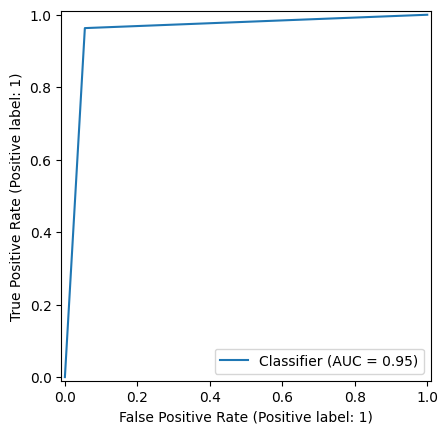

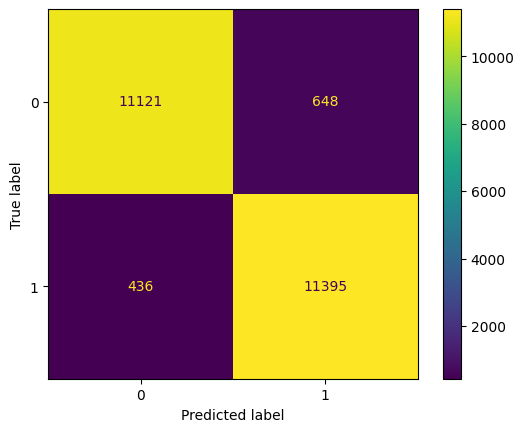

In [13]:
RocCurveDisplay.from_predictions(y_validation, y_predict)
plt.show()

ConfusionMatrixDisplay(confusion_matrix(y_validation, y_predict)).plot()
plt.show()

# Test

## Load data

In [27]:
df_test_original = pd.read_csv('data\\processed_data\\df_test.csv',
                                encoding='utf-8',
                                sep=','
                                )
df_test_original.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60.0,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82.0,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002.0,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816.0,0.0,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814.0,0.0,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [15]:
df_test_original

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60.0,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82.0,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002.0,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,0,59816.0,0.0,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,0,1814.0,0.0,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,0,81852.0,0.0,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,0,18.0,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,0,79636.0,0.0,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,0,110.0,0.0,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0
